In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.image as mpimg

In [3]:
#Globalne varijable
fs = 360
nyq = fs / 2

### Zadatak 1

Napisati funkciju u Pythonu koja učitava EKG signal i anotacije iz datog fajla.  Specifikacija funkcije je sljedeća:

```python
def read_ecg(filepath):
    '''
    Poziv funkcije: ecg, annot = read_ecg(filepath)

    Ulazni argumenti:
        filepath - putanja do fajla

    Izlazni argumenti:
        ecg   - odmjerci EKG signala
        annot - vektor sa pozicijama QRS kompleksa
    '''


In [4]:
def read_ecg(filepath):
    data = np.load(filepath)
    ecg = data['signal']
    annot = data['annotation']
    return ecg, annot

### Objašnjenje

U samom tekstu prve zadaće objašnjen je način učitavanja podataka iz fajlova, i taj pristup je primjenjen u implementiranoj funkciji.

### Zadatak 2

Napisati funkciju u Pythonu koja crta EKG signal i označava QRS komplekse, slično kao na Slici 1. Vremenska osa treba da bude izražena u sekundama.
Specifikacija funkcije je sljedeća:

```python
def plot_ecg(ecg, qrs):
    '''
    Poziv funkcije: plot_ecg(ecg, qrs)

    Ulazni argumenti:
        ecg - odmjerci EKG signala
        qrs - vektor sa pozicijama QRS kompleksa
    '''


In [5]:
def plot_ecg(ecg, qrs):
    t = np.arange(len(ecg)) / fs 

    plt.figure(figsize=(12, 4))
    plt.plot(t, ecg, label='EKG signal')
    plt.plot(qrs / fs, ecg[qrs], 'ro', label='QRS kompleksi')  
    plt.xlabel('Vreme (s)')
    plt.ylabel('Amplituda (mV)')
    plt.title('EKG signal sa označenim QRS kompleksima')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Objašnjenje 
Prikazujemo ekg signal kao liniju i onda na njoj crvenim tačkama označavamo QRS komplekse.

### Zadatak 3

Projektovati digitalni filtar **propusnik opsega** koji zadovoljava sljedeće zahtjeve:
- slabljenje **ne veće od 3 dB** u opsegu od **5 Hz do 11 Hz**
- slabljenje **najmanje 40 dB** za frekvencije **manje od 2 Hz** i **veće od 18 Hz**

Nacrtati funkciju pojačanja, faznu karakteristiku i grupno kašnjenje ovog filtra. Frekvencijsku osu označiti u Hz. Pokazati da filtar zadovoljava
date zahtjeve.

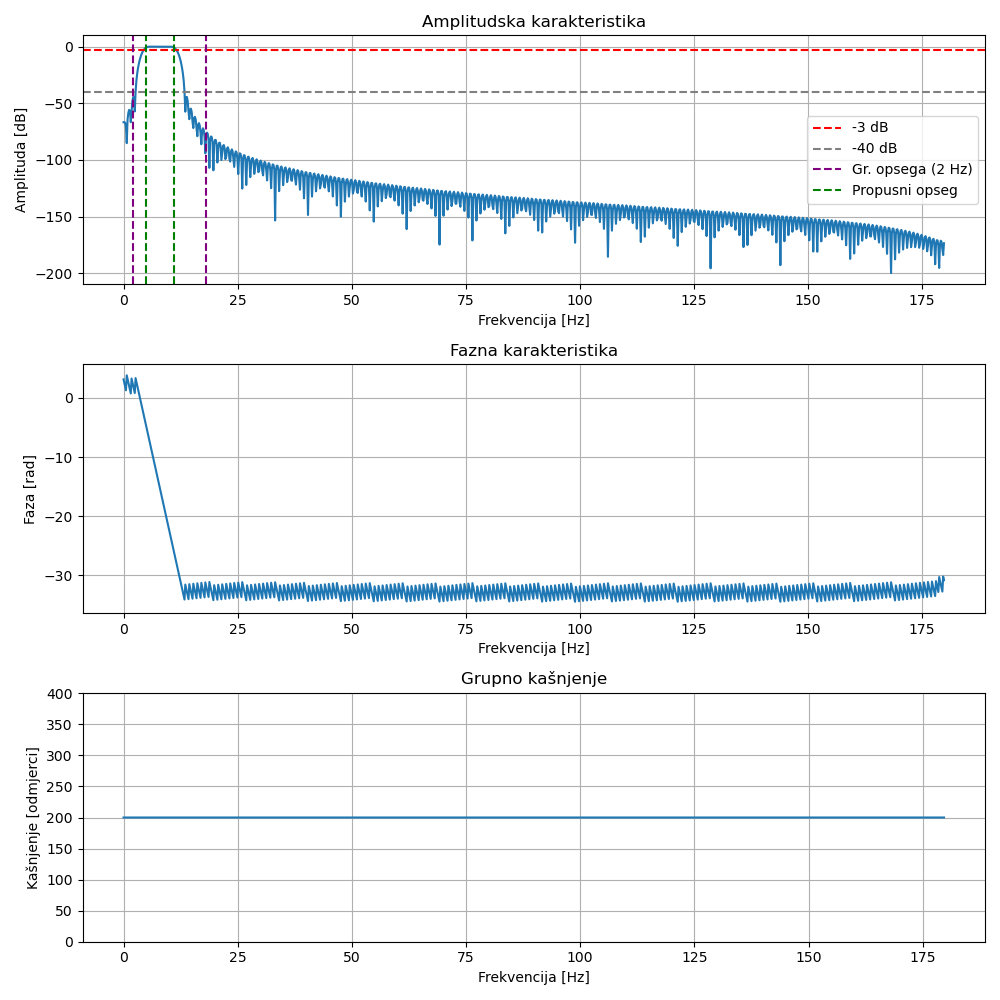

In [6]:
N = 401  
cutoff = [4, 12]  

bandpass_hann = signal.firwin(N, cutoff, window='hann', pass_zero=False, fs=fs)

w, H = signal.freqz(bandpass_hann, worN=1024, fs=fs)

amplitude_db = 20 * np.log10(np.maximum(np.abs(H), 1e-10))
phase = np.unwrap(np.angle(H))
w_gd, gd = signal.group_delay((bandpass_hann, 1), fs=fs)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(w, amplitude_db)
plt.axhline(-3, color='r', linestyle='--', label='-3 dB')
plt.axhline(-40, color='gray', linestyle='--', label='-40 dB')
plt.axvline(2, color='purple', linestyle='--', label='Gr. opsega (2 Hz)')
plt.axvline(18, color='purple', linestyle='--')
plt.axvline(5, color='green', linestyle='--', label='Propusni opseg')
plt.axvline(11, color='green', linestyle='--')
plt.title("Amplitudska karakteristika")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Amplituda [dB]")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(w, phase)
plt.title("Fazna karakteristika")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Faza [rad]")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w_gd, gd)
plt.title("Grupno kašnjenje")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Kašnjenje [odmjerci]")
plt.yticks(np.arange(0, N, 50))  
plt.ylim(0, N)
plt.grid(True)

plt.tight_layout()
plt.show()

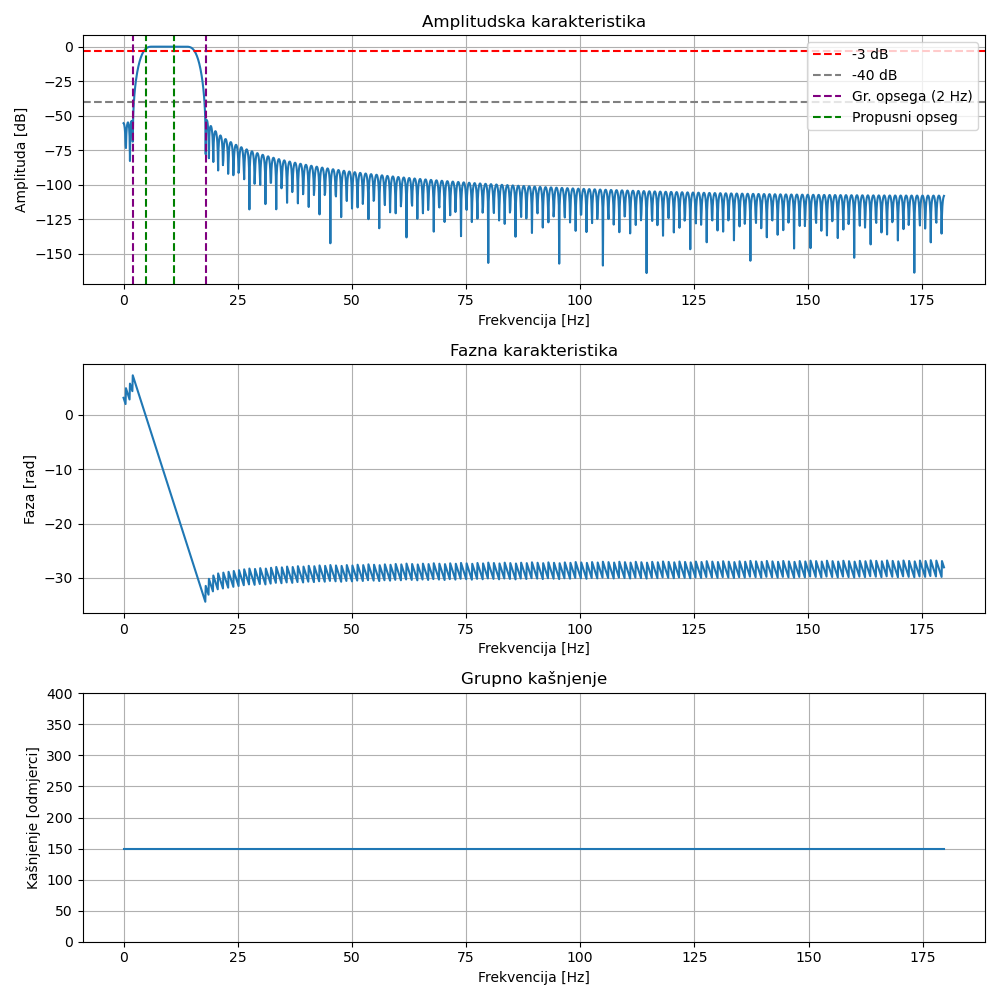

In [7]:
wp = [4, 16]

N = 121  
beta = 5  

bandpass_kaiser = signal.firwin(301, wp, window=('kaiser', beta), pass_zero=False, fs=fs)

w, H = signal.freqz(bandpass_kaiser, worN=2048, fs=fs)

amplitude_db = 20 * np.log10(np.maximum(np.abs(H), 1e-10))
phase = np.unwrap(np.angle(H))
w_gd, gd = signal.group_delay((bandpass_kaiser, 1), fs=fs)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(w, amplitude_db)
plt.axhline(-3, color='r', linestyle='--', label='-3 dB')
plt.axhline(-40, color='gray', linestyle='--', label='-40 dB')
plt.axvline(2, color='purple', linestyle='--', label='Gr. opsega (2 Hz)')
plt.axvline(18, color='purple', linestyle='--')
plt.axvline(5, color='green', linestyle='--', label='Propusni opseg')
plt.axvline(11, color='green', linestyle='--')
plt.title("Amplitudska karakteristika")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Amplituda [dB]")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(w, phase)
plt.title("Fazna karakteristika")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Faza [rad]")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w_gd, gd)
plt.title("Grupno kašnjenje")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Kašnjenje [odmjerci]")
plt.yticks(np.arange(0, 401, 50))  
plt.ylim(0, 401)
plt.grid(True)

plt.tight_layout()
plt.show()

### Objašnjenje: 
Kreiramo FIR filtar obzirom da nam je bitno da fazna karakeristika bude linearna jer je oblik signala važan za detekciju QRS kompleksa. 
Prvo projektujemo filtar korištenjem Hanovog prozora, a zatim korištenjem Kaiserovog prozora. Filtar koji koristi Kaiserov prozor je znatno manjeg reda 
i prilikom upotrebe daje bolje rezultate tako da će se on koristiti u daljim zadacima. 
Prikazujemo redom amplitudsku i faznu karakteristiku, kao i grupno kašnjenje za oba filtra. U računanju amplitudske karakteristike dodajemo jako malu
vrijednost da izbjegnemo log(0).

### Zadatak 4: 
Predložiti funkciju prenosa i implementirati **derivacijski filtar**. Nacrtati funkciju pojačanja, faznu karakteristiku i grupno kašnjenje
ovog filtra. Frekvencijsku osu označiti u Hz.

C:\Users\Admin\anaconda3\envs\odosLab\Lib\site-packages\scipy\signal\_filter_design.py:703: RuntimeWarning: divide by zero encountered in divide
  gd = np.real(num / den) - a.size + 1
C:\Users\Admin\anaconda3\envs\odosLab\Lib\site-packages\scipy\signal\_filter_design.py:703: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_21356\4056598506.py:8: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w_gd, gd = signal.group_delay((b, a), fs=fs)


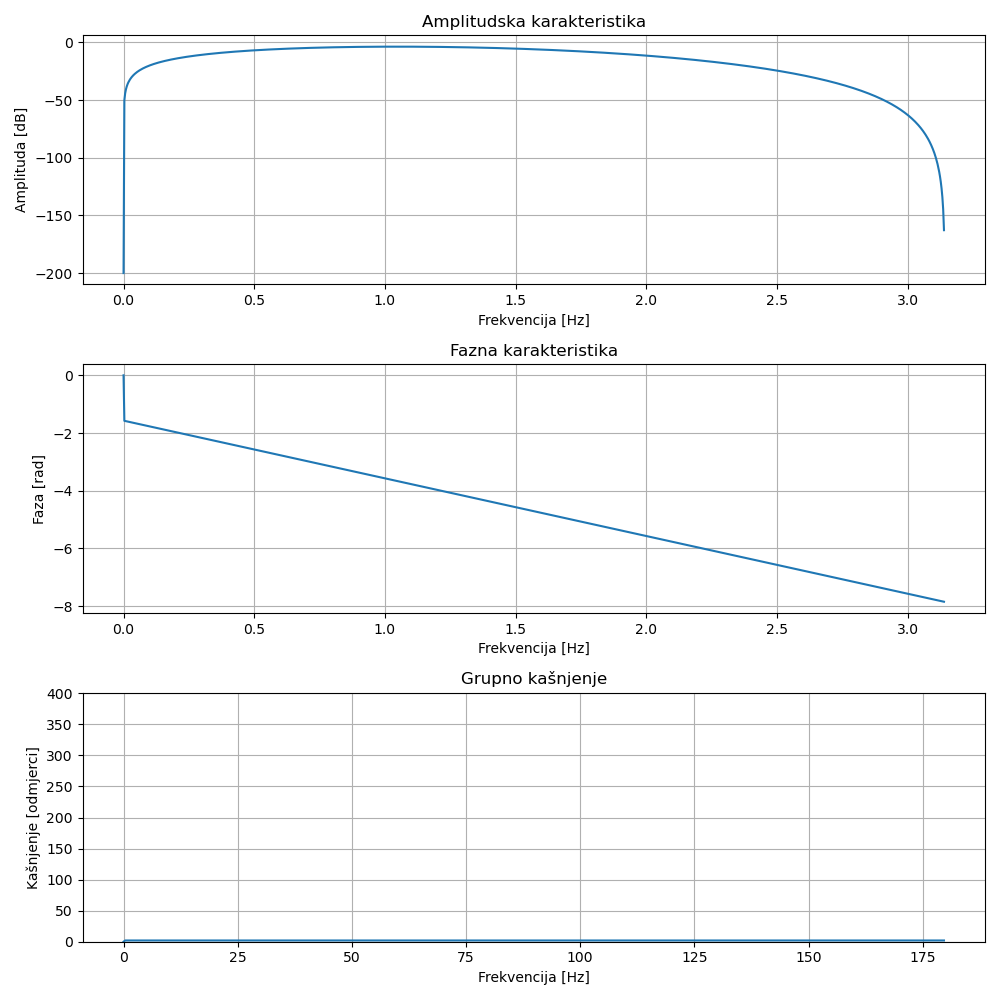

In [8]:
b = np.array([-1, -2, 0, 2, 1]) / 8
a = [1]

w, H = signal.freqz(b, a, worN=1024)

amplitude_db = 20 * np.log10(np.maximum(np.abs(H), 1e-10))
phase = np.unwrap(np.angle(H))
w_gd, gd = signal.group_delay((b, a), fs=fs)
gd = np.nan_to_num(gd, nan=0.0, posinf=0.0, neginf=0.0)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(w, amplitude_db)
plt.title("Amplitudska karakteristika")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Amplituda [dB]")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(w, phase)
plt.title("Fazna karakteristika")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Faza [rad]")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w_gd, gd)
plt.title("Grupno kašnjenje")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Kašnjenje [odmjerci]")
plt.yticks(np.arange(0, 401, 50))  
plt.ylim(0, 401)
plt.grid(True)

plt.tight_layout()
plt.show()

### Objašnjenje: 
Koristeći ChatGPT i sljedeći izvor:

https://dsp.stackexchange.com/questions/14267/ways-to-compute-the-n-the-derivative-of-a-discrete-signal

shvatila sam derivacijski filtar kao filtar koji računa razliku trenutnog odmjerka i prethodnog i sljedećeg. Postoji više nivoa, tj. koliko razlika 
pravimo i ChatGPT mi je predložio date koeficijente koji su se poklapali sa formulom u datom izvoru, tako da sam ih iskoristila za projektovanje. 
Dobijeni filtar u daljem korištenju pravi dobre rezultate tako da ga prihvatam kao rješenje.

### Zadatak 5: 
Analitičkim putem odrediti impulsni odziv Hilbertovog transformatora. Nacrtati dobijeni impulsni odziv na pogodno odabranom intervalu.

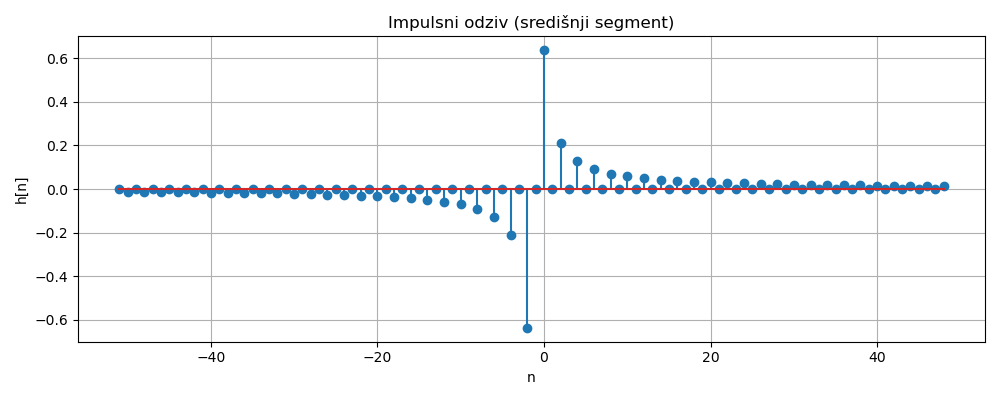

In [9]:
N = 601

w = np.linspace(-np.pi, np.pi, N, endpoint=False)

H = np.zeros(N, dtype=complex)
H[w < 0] = 1j   
H[w > 0] = -1j  
H[w == 0] = 0   

h = np.fft.ifft(np.fft.ifftshift(H))
h = np.real(h)  
h = np.fft.fftshift(h)

n = np.arange(-N//2, N//2)
center = N // 2
width = 50  
start = center - width
end = center + width

plt.figure(figsize=(10, 4))
plt.stem(n[start:end], h[start:end])
plt.title("Impulsni odziv (središnji segment)")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.tight_layout()
plt.show()

### Objasnjenje: 
Analitičkim putem dolazimo do impulsnog odziva koji se poklapa sa informacijama koje su dostupne na Wikipedia sajtu:
https://en.wikipedia.org/wiki/File:Bandpass_discrete_Hilbert_transform_filter.tif

Obzirom da inverzna DTFT nije implementirana koristim IFFT uz malo prilagođavanje.

### Zadatak 6: 
Metodom prozorskih funkcija projektovati digitalni **Hilbertov transformator**. Filtar treba da ima oscilacije manje od 0.05 dB i slabljenje
manje od 3 dB u frekvencijskom opsegu [0.01π, 0.99π]. Nacrtati amplitudnu i faznu karakteristiku dobijenog filtra. Pokazati da filtar zadovoljava
date zahtjeve i komentarisati razlike i slicnosti u odnosu na frekvencijsku karakteristiku idealnog Hilbertovog transformatora.

C:\Users\Admin\AppData\Local\Temp\ipykernel_21356\1734724095.py:8: UserWarning: The filter's denominator is extremely small at frequencies [0.000], around which a singularity may be present
  w_gd, gd = signal.group_delay((h_hilbert, 1), fs=fs)


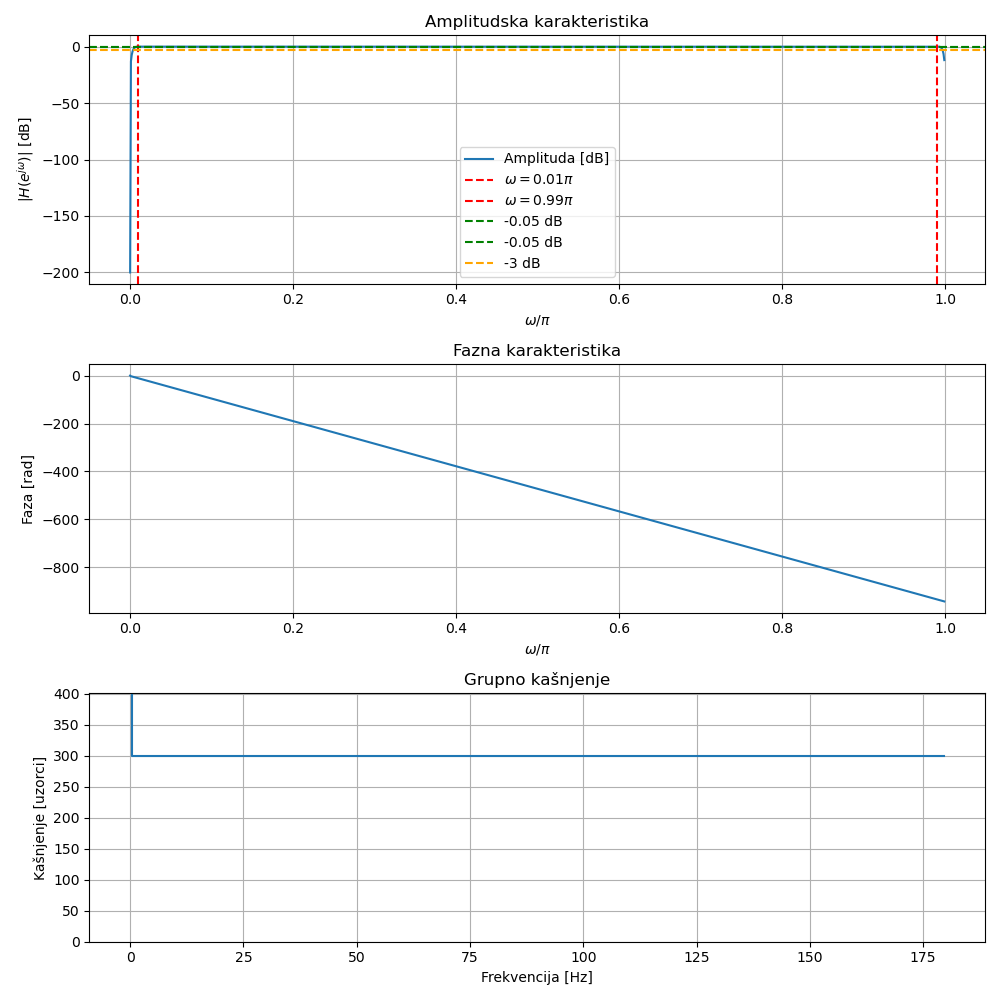

In [10]:
window = signal.get_window('blackman', N, fftbins=False)
h_hilbert = h * window

w, H = signal.freqz(h_hilbert, worN=1024)

amplitude_db = 20 * np.log10(np.maximum(np.abs(H), 1e-10))
phase = np.unwrap(np.angle(H))
w_gd, gd = signal.group_delay((h_hilbert, 1), fs=fs)
gd = np.nan_to_num(gd, nan=0.0, posinf=0.0, neginf=0.0)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(w / np.pi, amplitude_db, label='Amplituda [dB]')
plt.axvline(0.01, color='red', linestyle='--', label=r'$\omega = 0.01\pi$')
plt.axvline(0.99, color='red', linestyle='--', label=r'$\omega = 0.99\pi$')
plt.axhline(-0.05, color='green', linestyle='--', label='-0.05 dB')
plt.axhline(0.05, color='green', linestyle='--', label='-0.05 dB')
plt.axhline(-3, color='orange', linestyle='--', label='-3 dB')
plt.xlabel(r'$\omega / \pi$')
plt.ylabel(r'$|H(e^{j\omega})|\ \mathrm{[dB]}$')
plt.title('Amplitudska karakteristika')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(w / np.pi, phase)
plt.xlabel(r'$\omega / \pi$')
plt.ylabel(r'Faza [rad]')
plt.title('Fazna karakteristika')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w_gd, gd)
plt.title("Grupno kašnjenje")
plt.xlabel("Frekvencija [Hz]")
plt.ylabel("Kašnjenje [uzorci]")
plt.yticks(np.arange(0, 401, 50))  
plt.ylim(0, 401)
plt.grid(True)

plt.tight_layout()
plt.show()

### Objašnjenje : 
Koristimo Blackman-ov prozor i iterativnim postupkom dolazimo do toga da je zadovoljavajući red 601. Taj prozor dalje množimo impulsnim odzivom kojeg
smo dobili u prošlom zadatku i dobijamo Hilbertov transformator. Zumiranjem na grafik vidimo da su ispunjeni svi zahtijevani uslovi (prikazano
na slici ispod). Takođe je prikazano i grupno kašnjenje jer će nam biti potrebno u kasnijim fazama obrade signala.
Idealni Hilbertov transformator ima pojačanje odnosmo amplitudu jednaku jedinici u propusnom opsegu, a moj projektovani filtar ima vrlo male oscilacije 
manje od 0.05db što je poprilično dobra aproksimacija. Fazna karakteristika idealnog Hilbertovog transformatora daje pomak od −𝜋/2 za ω>0, odnosno +𝜋/2
za ω<0. Fazna karakteristika projektovanog filtra je linearna što daje približno konstantno grupno kašnjenje i daje dobre rezultate obzirom na konačnu 
širinu impulsnog odziva i prozora.

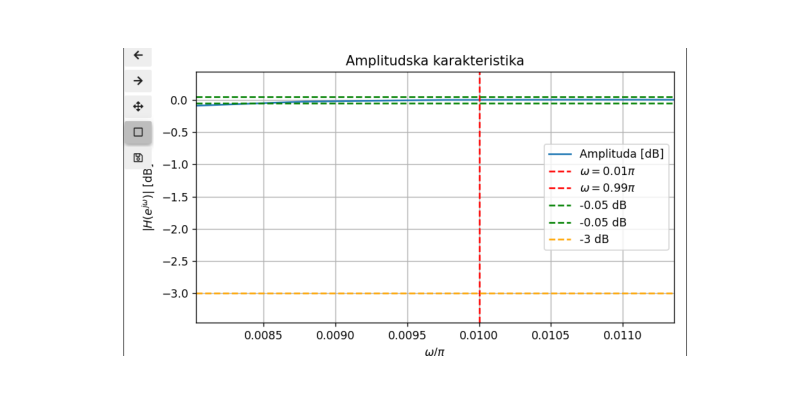

In [11]:
plt.figure(figsize=(8, 4))

img = mpimg.imread('Screenshot.png')

plt.imshow(img)
plt.axis('off')  
plt.show()

### Zadatak 7: 
Analitičkim putem izračunati odziv idealnog Hilbertovog transformatora na prostoperiodični signal x(n) = cos 0.2πn. Generisati uzorak
datog signala dužine 480 odmjeraka i demonstrirati rad realizovanog Hilbertovog transformatora. Nacrtati grafike ulaznog i izlaznog signala.

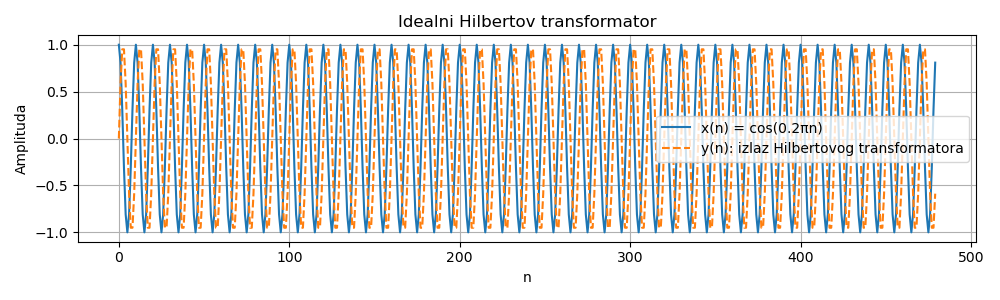

In [12]:
N = 480  
n = np.arange(N)
x = np.cos(0.2 * np.pi * n)  

X = np.fft.fft(x)
H = np.zeros(N, dtype=complex)

if N % 2 == 0:
    H[1:N//2] = -1j
    H[N//2+1:] = 1j
    H[N//2] = -1j  
else:
    H[1:(N-1)//2+1] = -1j
    H[(N+1)//2:] = 1j

Y = X * H

y_ideal = np.fft.ifft(Y).real

plt.figure(figsize=(10, 3))
plt.plot(n, x, label='x(n) = cos(0.2πn)')
plt.plot(n, y_ideal, label='y(n): izlaz Hilbertovog transformatora', linestyle='dashed')
plt.title("Idealni Hilbertov transformator")
plt.xlabel("n")
plt.ylabel("Amplituda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


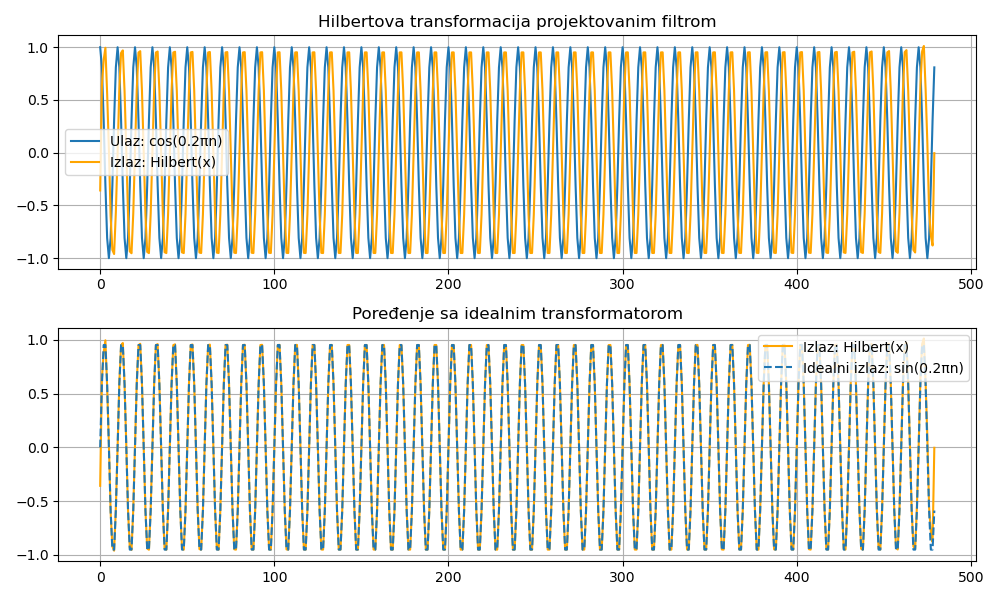

In [14]:
y = signal.convolve(x, h_hilbert, mode='same')

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, x, label='Ulaz: cos(0.2πn)')
plt.plot(n, y, label='Izlaz: Hilbert(x)', color='orange')
plt.grid()
plt.legend()
plt.title('Hilbertova transformacija projektovanim filtrom')

plt.subplot(2, 1, 2)
plt.plot(n, y, label='Izlaz: Hilbert(x)', color='orange')
plt.plot(n, y_ideal, '--', label='Idealni izlaz: sin(0.2πn)')
plt.grid()
plt.legend()
plt.title('Poređenje sa idealnim transformatorom')

plt.tight_layout()
plt.show()

### Objašnjenje: 
Analitičkim putem, korištenjem inverzne DTFT, dolazimo do odziva idealnog Hilbertovog transformatora što je prikazano na prvom grafiku.
Drugi grafik predstavlja odziv koji dobijamo kada ulazni signal provučemo kroz Hilbertov transformator koji je projektovan u prethodnom zadatku. Na
trećem grafiku vidimo da se odzivi gotovo potpuno poklapaju.

### Zadatak 8: 
Implementirati i demonstrirati korake pretprocesiranja EKG signala na bar jednom od datih signala. Uporedno prikazati reprezentativan
uzorak ulaznog signala i odgovarajućih signala na izlazima pojedinih blokova.

In [15]:
def plot_ecg_preprocessing(ecg, annot):
    start = 0  
    end = 2000    

    fig, axs = plt.subplots(4, 1, figsize=(10, 15))

    axs[0].plot(np.arange(start, end), ecg[start:end])
    axs[0].set_title('Reprezentativni dio EKG signala')
    axs[0].set_xlabel('Odmjerak')
    axs[0].set_ylabel('Amplituda')
    axs[0].grid(True)

    ecg_bandpass = np.convolve(bandpass_kaiser, ecg, mode='same')
    axs[1].plot(ecg[:2000], label='Originalni EKG')
    axs[1].plot(ecg_bandpass[:2000], label='Nakon bandpass filtra', linestyle='--')
    axs[1].set_xlabel('Odmjerci')
    axs[1].set_ylabel('Amplituda')
    axs[1].legend()
    axs[1].set_title('Bandpass filtriranje EKG signala')
    axs[1].grid(True)

    ecg_deriv = np.convolve(b, ecg_bandpass, mode='same')
    axs[2].plot(ecg_bandpass[:2000], label='Nakon bandpass filtra')
    axs[2].plot(ecg_deriv[:2000], label='Nakon derivatora', linestyle='--')
    axs[2].set_xlabel('Odmjerci')
    axs[2].set_ylabel('Amplituda')
    axs[2].legend()
    axs[2].set_title('Efekat derivatora na filtrirani EKG signal')
    axs[2].grid(True)

    ecg_hilbert = np.convolve(h_hilbert, ecg_deriv, mode='same')
    axs[3].plot(ecg_deriv[:2000], label='Nakon deriv filtra')
    axs[3].plot(ecg_hilbert[:2000], label='Nakon Hilbertovog transformatora', linestyle='--')
    axs[3].set_xlabel('Odmjerci')
    axs[3].set_ylabel('Amplituda')
    axs[3].legend()
    axs[3].set_title('Efekat Hilbertovog transformatora')
    axs[3].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return ecg_hilbert

In [16]:
def ecg_preprocessing(ecg, annot):
    ecg_bandpass = np.convolve(bandpass_kaiser, ecg, mode='same')
    ecg_deriv = np.convolve(b, ecg_bandpass, mode='same')
    ecg_hilbert = np.convolve(h_hilbert, ecg_deriv, mode='same')

    return ecg_hilbert

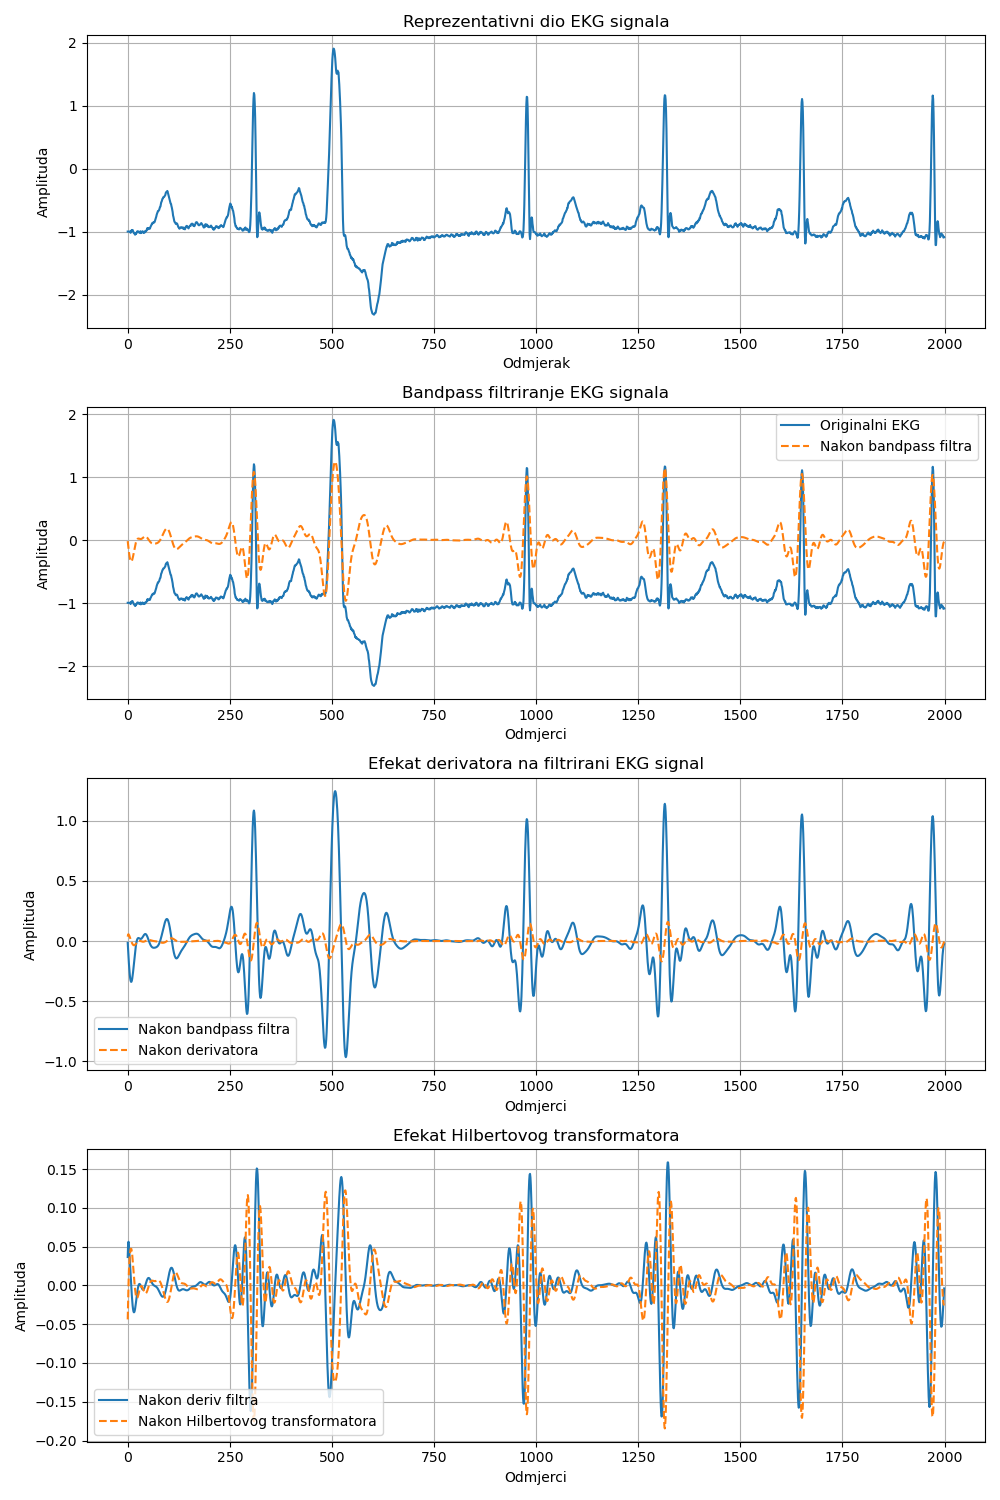

In [17]:
ecg, annot = read_ecg('119.npz')
ecg_hilbert = plot_ecg_preprocessing(ecg, annot)

### Zadatak 9: 
Predložiti i implementirati blok za detekciju kandidata za QRS komplekse.

### Zadatak 10: 
Implementirati blok za odlučivanje da li kandidati detektovani u prethodnom koraku odgovaraju QRS kompleksima prema opisu u uvodu.

In [18]:
from scipy.signal import find_peaks

def detect_qrs_complexes(signal, fs):
    min_distance = int(0.196 * fs) 
    peaks, _ = find_peaks(signal, distance=min_distance)

    detection_threshold = 0.2 * np.max(signal)
    qrs_locs = []
    last_qrs = -np.inf

    for i, peak in enumerate(peaks):
        win = signal[max(0, peak - 10):min(len(signal), peak + 10)]
        diff = np.diff(win)
        if not (np.any(diff > 0) and np.any(diff < 0)):
            continue  

        if signal[peak] >= detection_threshold:
            if peak - last_qrs >= min_distance:
                qrs_locs.append(peak)
                last_qrs = peak
        else:
            if len(qrs_locs) >= 2:
                rr_avg = np.mean(np.diff(qrs_locs))
                if (peak - qrs_locs[-1] > 1.5 * rr_avg and
                        signal[peak] > 0.5 * detection_threshold and
                        peak - qrs_locs[-1] > int(0.36 * fs)):
                    qrs_locs.append(peak)
                    last_qrs = peak

    return np.array(qrs_locs)

### Objašnjenje: 
Ova dva zadatka kombinovala sam u jednu funkciju. Iskoristila sam algoritam koji sam pronašla na ovom sajtu:

https://www.mathworks.com/help/dsp/ug/real-time-ecg-qrs-detection.html

Pravila 1 i 3 odnose se na detekciju QRS kompleksa kako ste ju Vi opisali u samoj zadaći i to je rješenje devetog zadatka, a pravilo 2 odnosi se na
razdvajanje pravih QRS kompleksa i lažnih i to je rješenje desetog zadatka. Dakle, redom: pronalazimo sve lokalne maksimume koji su udaljeni minimalno 
196ms, postavljamo dinamički prag detekcije od 0.2 * np.max(signal), prolazimo kroz vrhove i provjeravamo da li postoje pozitivni i negativni nagib 
oko vrha, da li prelazi prag detekcije i da li je prošao 1.5 prosječni vremenski razmak između dva uzastopna QRS kompleksa bez detekcije.

### Zadatak 11: 
Ilustrovati rad kompletnog detektora na datim signalima. Korištenjem funkcije plot_ecg prikazati reprezentativne uzorke signala sa 
označenim detekcijama QRS kompleksa za primjere dobrih i loših detekcija. Vodite računa o tome da svi koraci pretprocesiranja unose kašnjenje i da
način detekcije vršnih vrijednosti takođe moze unijeti pomak u odnosu na tačnu lokaciju QRS kompleksa.

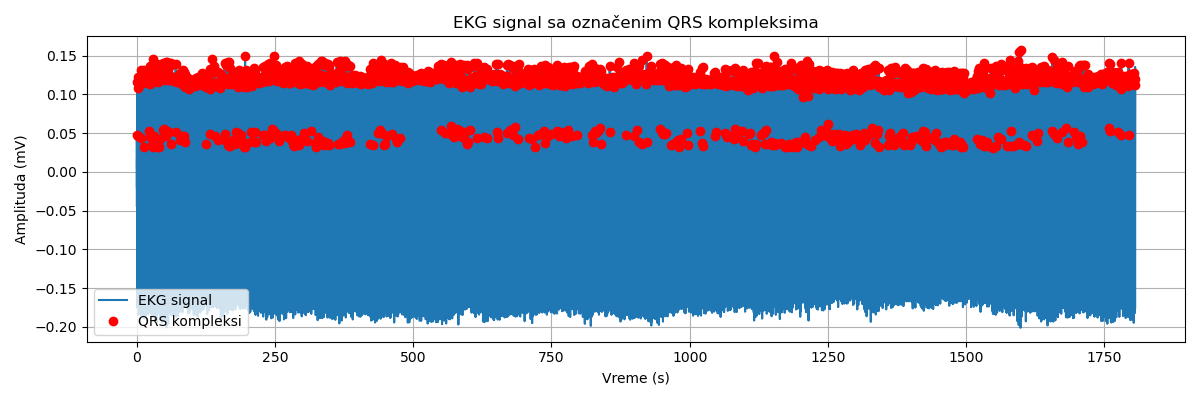

In [19]:
qrs_complexes = detect_qrs_complexes(ecg_hilbert, fs=fs)
plot_ecg(ecg_hilbert, qrs_complexes)

### Zadatak 12: 
Kvantitativno ocijeniti performanse detektora koristeći date signale i ručno anotirane pozicije QRS kompleksa. Za svaki signal tabelarno
prikazati ukupan broj QRS kompleksa, broj lažno negativnih i lažno pozitivnih detekcija, te vrijednosti osjetljivosti i preciznosti.

In [20]:
def evaluate_detector(true_qrs, detected_qrs, fs, tolerance_ms=100):
    tolerance_samples = int(tolerance_ms * fs / 1000)
    
    true_qrs = np.array(true_qrs)
    detected_qrs = np.array(detected_qrs) 
    matched_true = np.zeros(len(true_qrs), dtype=bool)
    matched_detected = np.zeros(len(detected_qrs), dtype=bool)
    
    for i, d in enumerate(detected_qrs):
        diffs = np.abs(true_qrs - d)
        close_idx = np.where(diffs <= tolerance_samples)[0]
        for idx in close_idx:
            if not matched_true[idx]:
                matched_true[idx] = True
                matched_detected[i] = True
                break
    
    TP = np.sum(matched_true)
    FN = len(true_qrs) - TP
    FP = len(detected_qrs) - TP
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    return {
        "TP": TP,
        "FN": FN,
        "FP": FP,
        "sensitivity": sensitivity,
        "precision": precision,
        "total_true_qrs": len(true_qrs)
    }

In [21]:
#qrs_complexes -= 450
results = evaluate_detector(annot, qrs_complexes, fs=360)

print(f"{'Metrička':<20}{'Vrijednost'}")
print("-" * 35)
print(f"{'Ukupno QRS':<20}{results['total_true_qrs']}")
print(f"{'Tačno pozitivni (TP)':<20}{results['TP']}")
print(f"{'Lažno negativni (FN)':<20}{results['FN']}")
print(f"{'Lažno pozitivni (FP)':<20}{results['FP']}")
print(f"{'Osjetljivost (Se)':<20}{results['sensitivity']:.3f}")
print(f"{'Preciznost (P)':<20}{results['precision']:.3f}")


Metrička            Vrijednost
-----------------------------------
Ukupno QRS          2094
Tačno pozitivni (TP)1988
Lažno negativni (FN)106
Lažno pozitivni (FP)346
Osjetljivost (Se)   0.949
Preciznost (P)      0.852


In [22]:
import os

def process_files_in_directory(directory):
    print(f"{'Ime fajla':<30}{'TP':<10}{'FN':<10}{'FP':<10}{'Osjetljivost':<20}{'Preciznost':<20}{'Ukupno tačnih QRS':<20}")
    print("="*120)
    
    for filename in os.listdir(directory):
        if filename.endswith('.npz'):
            filepath = os.path.join(directory, filename)
            print(f"Procesovanje fajla: {filename}")
            ecg, annot = read_ecg(filename)
            
            ecg_hilbert = ecg_preprocessing(ecg, annot)

            qrs_complexes = detect_qrs_complexes(ecg_hilbert, fs=360)

            true_qrs = annot
            results = evaluate_detector(true_qrs, qrs_complexes, fs=360)

            sensitivity = f"{results['sensitivity']:.4f}"
            precision = f"{results['precision']:.4f}"

            print(f"{filename:<30}{results['TP']:<10}{results['FN']:<10}{results['FP']:<10}{sensitivity:<20}{precision:<20}{results['total_true_qrs']:<20}")

process_files_in_directory(os.getcwd())  

Ime fajla                     TP        FN        FP        Osjetljivost        Preciznost          Ukupno tačnih QRS   
Procesovanje fajla: 100.npz
100.npz                       2273      1         0         0.9996              1.0000              2274                
Procesovanje fajla: 107.npz
107.npz                       2076      64        78        0.9701              0.9638              2140                
Procesovanje fajla: 108.npz
108.npz                       1752      72        0         0.9605              1.0000              1824                
Procesovanje fajla: 113.npz
113.npz                       1795      1         1383      0.9994              0.5648              1796                
Procesovanje fajla: 117.npz
117.npz                       1535      4         3         0.9974              0.9980              1539                
Procesovanje fajla: 119.npz
119.npz                       1988      106       346       0.9494              0.8518              2094  

### Zaključak:
Dobijeni rezultati pokazuju da imamo relativno dobru preciznost i osjetljivost. Zakomentarisana linija koju vidite ostala je jer smo mogli i tako da
uradimo zadatak: da konvoluciju radimo u mode-u full koja bi izvršila pomijeranje, a da onda dobijen rezultat iz detektora pomjerimo za 450 odmjeraka 
koliko je ukupno kašnjenje 3 korištena filtera. Ja sam se odlučila za mode same koji ne vrši pomijeranje signala. U toku samo izrade signala vršila sam 
variranje raznih parametara i evo na primjer kada obradimo ulaz 113.npz dobijemo dosta lažno pozitivnih QRS kompleksa što se popravi kada pooštrimo
prag detekcije kandidata, međutim to se odrazi na ostale ulaze pa dobijamo više lažno negativnih, pa je ovo neka sredina koju sam odredila. Takođe, upotrebom drugih prozora dobijamo drugačije vrijednosti amplituda signala, mislim da je ovo trenutno rješenje dovoljno dobro.